# Projeto Webscraping mercado cripto

Este projeto tem o objetivo de buscar diversos dados online de forma automatizada e rápida

In [1]:
#Vamos começar importando as bibliotecas necessárias

from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

In [2]:
website = 'https://www.coingecko.com'
response = requests.get(website)
soup = bs(response.content, 'html.parser')

In [3]:
results = soup.find('table', {'class':'table-scrollable'}).find('tbody').find_all('tr')

## Agora vamos acessar os campos escolhidos

### Nome

In [4]:
#Vamos pegar o nome do primeiro ativo
results[0].find('a', {'class': 'tw-hidden lg:tw-flex font-bold tw-items-center tw-justify-between'}).get_text().strip()

'Bitcoin'

### Preço

In [5]:
#Vamos acessar o preço do primeiro ativo

results[0].find('td', {'class': 'td-price price text-right pl-0'}).get_text().strip()

'$39,501.95'

### Variação 24h

In [6]:
#Esta é a variação do ativo nas últimas 24h

results[0].find('td', {'class': 'td-change24h'}).get_text().strip()

'1.1%'

### Volume 24h

In [7]:
#Este é o volume negociado no ativo nas últimas 24h

results[0].find('td', {'class': 'td-liquidity_score'}).get_text().strip()

'$15,187,403,950'

### Valor de Mercado

In [8]:
#Agora vamos acessar valor de mercado total do primeiro ativo

results[0].find('td', {'class': 'td-market_cap'}).get_text().strip()

'$749,957,447,784'

## Loop para coletar dados de todas as linhas
Como coletamos os resultados apenas do primeiro ativo, precisamos requisitar as infos dos outros


In [9]:
#Vamos começar criando listas vazias para preencher com os valores que desejamos

nome = []
preco = []
variacao = []
volume = []
mercado = []

In [10]:
#Vamos criar o loop para coletar os nomes unitariamente

for result in results:
    
    #nome
    try:
        nome.append(result.find('a', {'class': 'tw-hidden lg:tw-flex font-bold tw-items-center tw-justify-between'}).get_text().strip())
    except:
        nome.append('n/a')

In [11]:
#Agora que temos um loop para os nomes, vamos criar um loop para cada uma das outras informações necessárias

for result in results:
    
    #preço
    try:
        preco.append(result.find('td', {'class': 'td-price price text-right pl-0'}).get_text().strip())
    except:
        preco.append('n/a')
        
        
    #Variação
    try:
        variacao.append(result.find('td', {'class': 'td-change24h'}).get_text().strip())
    except:
        variacao.append('n/a')
            
            
    #Volume
    try:
        volume.append(result.find('td', {'class': 'td-liquidity_score'}).get_text().strip())
    except:
        volume.append('n/a')        
     
    
    #Valor de Mercado
    try:
        mercado.append(result.find('td', {'class': 'td-market_cap'}).get_text().strip())
    except:
        mercado.append('n/a')       

## Listando os valores num mesmo objeto

In [12]:
#Vamos criar um Pandas dataframe para armazenar os campos coletados no scrapping

tabela_cripto = pd.DataFrame({'Criptoativo': nome, 'Preço': preco, 'Variação': variacao, 'Volume 24h': volume, 'MarketCap': mercado})

## Vamos olhar a tabela pronta

In [13]:
display(tabela_cripto)

,Criptoativo,Preço,Variação,Volume 24h,MarketCap
0,Bitcoin,"$39,501.95",1.1%,"$15,187,403,950","$749,957,447,784"
1,Ethereum,"$2,671.04",2.1%,"$8,793,532,792","$320,400,416,553"
2,Tether,$1.00,0.1%,"$40,917,828,572","$79,892,618,393"
3,BNB,$384.93,2.5%,"$1,231,753,041","$64,744,790,532"
4,USD Coin,$1.00,-0.1%,"$2,045,418,232","$52,992,471,954"
...,...,...,...,...,...
95,Dash,$89.81,0.4%,"$94,184,833","$953,641,478"
96,Loopring,$0.760095,3.3%,"$90,696,634","$947,964,851"
97,Convex Finance,$17.55,-1.4%,"$40,232,920","$932,621,644"
98,Curve DAO Token,$2.25,-0.1%,"$100,583,535","$882,713,509"


## Mas fizemos a raspagem de apenas uma página. Como raspar múltiplas páginas e coletar os dados dos 100 ativos de cada página?

### Paginação do scrapping

Ao navegar pelas páginas, a alteração do link se dá desta forma:
 
  
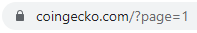
 
  

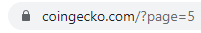

 
 
Vamos usar este padrão para coletar infos de diversas páginas em looping

In [15]:
#Vamos limpar nossas listas usadas no exemplo anterior, pois os valores trazidos pelo loop serão outros

nome = []
preco = []
variacao = []
volume = []
mercado = []

paginas = int(input('Quantas páginas de dados você deseja? '))

Quantas páginas de dados você deseja? 10


In [16]:
#Agora vamos criar um looping para alterar os links de acordo com o padrão informado anteriormente:

for i in range (1,(paginas + 1)):
    #Vamos criar um link através do looping
    website = 'https://www.coingecko.com/?page=' + str(i)
    
    #Agora vamos solicitar um request da página informada no website a cada iteração
    response = requests.get(website)
    
    #Cada html deverá passar por um objeto soup
    soup = bs(response.content, 'html.parser')
    
    #Os resultados do soup serão armazenados no results a cada iteração
    results = soup.find('table', {'class': 'table-scrollable'}).find('tbody').find_all('tr')
    
    #Agora vamos acessar os valores das variáveis definidas anteriormente
    #Para isso vamos fazer um looping a partir de da variável Results
    
    for result in results:
    
        #Nome
        try:
            nome.append(result.find('a', {'class': 'tw-hidden lg:tw-flex font-bold tw-items-center tw-justify-between'}).get_text().strip())
        except:
            nome.append('n/a')

        #Preço
        try:
            preco.append(result.find('td', {'class': 'td-price price text-right pl-0'}).get_text().strip())
        except:
            preco.append('n/a')


        #Variação
        try:
            variacao.append(result.find('td', {'class': 'td-change24h'}).get_text().strip())
        except:
            variacao.append('n/a')


        #Volume
        try:
            volume.append(result.find('td', {'class': 'td-liquidity_score'}).get_text().strip())
        except:
            volume.append('n/a')        


        #Valor de Mercado
        try:
            mercado.append(result.find('td', {'class': 'td-market_cap'}).get_text().strip())
        except:
            mercado.append('n/a')       

In [17]:
#Com os dados em mão, vamos inserí-los a um dataframe, como fizemos anteriormente
tabela_cripto = pd.DataFrame({'Criptoativo': nome, 'Preço': preco, 'Variação': variacao, 'Volume 24h': volume, 'MarketCap': mercado})

In [18]:
display(tabela_cripto)

,Criptoativo,Preço,Variação,Volume 24h,MarketCap
0,Bitcoin,"$39,478.98",1.1%,"$15,137,780,565","$749,957,447,784"
1,Ethereum,"$2,671.04",2.1%,"$8,793,532,792","$320,400,416,553"
2,Tether,$1.00,0.1%,"$40,917,828,572","$79,892,618,393"
3,BNB,$384.93,2.5%,"$1,231,753,041","$64,744,790,532"
4,USD Coin,$1.00,-0.1%,"$2,045,418,232","$52,992,471,954"
...,...,...,...,...,...
995,Populous,$0.357759,11.6%,"$296,263","$12,964,102"
996,88mph,$28.24,-4.6%,"$161,106","$12,959,426"
997,Cindicator,$0.006317193380,131.5%,"$14,490,168","$12,953,205"
998,Birake,$0.122600,1.6%,"$2,773.81","$12,946,212"


### Rodei o programa e coloquei 10 páginas para obter dados, e o dataframe ficou com 1000 registros.
#### A quantidade de páginas pode ser facilmente alterada algumas células acima

Por fim, vamos salvar os resultados numa pasta do Excel

In [19]:
tabela_cripto.to_excel('Varias_paginas.xlsx', index = False)